In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

from help_functions.prepare_data import most_recent_thursday, split_time
from help_functions.evaluate_daxmodels import evaluate_different_daxmodels, evaluate_daxmodel

from dax.help_functions.get_dax_data import get_data
from dax.help_functions.calculate_returns import calculate_returns
from dax.models.garch11_norm import get_garch_11_norm
from dax.models.garch11_t import get_garch_11_t
from dax.models.baseline import get_dax_forecasts_baseline

In [2]:
dax_df = get_data()
dax_df = calculate_returns(dax_df, lags=5)
start_date_excl = most_recent_thursday(dax_df) - timedelta(days=1)
dax_df_cval = dax_df.loc[(dax_df.index >= dax_df.index[8000])
                         & (dax_df.index < start_date_excl)]

In [3]:
# check if functions work
baseline = {
    'name': 'baseline',
    'function': get_dax_forecasts_baseline
}
garch_norm = {
    'name': 'GARCH(1,1) normal distributed',
    'function': get_garch_11_norm
}
garch_t = {
    'name': 'GARCH(1,1) t distributed',
    'function': get_garch_11_t
}
models = [baseline, garch_norm, garch_t] 

In [4]:
forecasts_bl = get_dax_forecasts_baseline(dax_df_cval)
forecasts_bl

forecasts_garch_norm = get_garch_11_norm(dax_df_cval)
forecasts_garch_norm

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2627.2361910951313
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2092.3311985468636
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2158.591735421752
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1688.2271775956897
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1684.6711763640203
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1684.6453940433835
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1684.6450883583327
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1684.645087488748
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1684.645087488748
            Iterations: 8
            Function evaluations: 42
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      5,   Neg. LLF: 6138.250953446583
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2701.844496413176
Iteration:      3,   Func. Count:     21,   Neg. LLF: 2201.78234728

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975
date_time,,,,,,,,
2023-11-23,2023-11-22,DAX,1 day,-1.703159,-0.586115,0.0,0.586115,1.703159
2023-11-24,2023-11-22,DAX,2 day,-2.276355,-0.783371,0.0,0.783371,2.276355
2023-11-27,2023-11-22,DAX,5 day,-3.174876,-1.092582,0.0,1.092582,3.174876
2023-11-28,2023-11-22,DAX,6 day,-4.053553,-1.394964,0.0,1.394964,4.053553
2023-11-29,2023-11-22,DAX,7 day,-4.978062,-1.713119,0.0,1.713119,4.978062


In [5]:
evaluation = evaluate_different_daxmodels(models,dax_df_cval, last_x=20, years=False, months=False, weeks=True)

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2617.245032599986
Iteration:      2,   Func. Count:     14,   Neg. LLF: 2082.4186816190295
Iteration:      3,   Func. Count:     20,   Neg. LLF: 2151.4062463699006
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1683.973489679995
Iteration:      5,   Func. Count:     30,   Neg. LLF: 1679.692695707966
Iteration:      6,   Func. Count:     34,   Neg. LLF: 1679.6676950847266
Iteration:      7,   Func. Count:     38,   Neg. LLF: 1679.6675283326535
Iteration:      8,   Func. Count:     42,   Neg. LLF: 1679.6675106008768
Iteration:      9,   Func. Count:     46,   Neg. LLF: 1679.667503817841
Iteration:     10,   Func. Count:     49,   Neg. LLF: 1679.6675038178032
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1679.667503817841
            Iterations: 10
            Function evaluations: 49
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      5,   Neg. LLF: 6109.231129

## Visualize Comparsion

In [6]:
models[1]['evaluation']

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,observation,score
date_time,,,,,,,,,,
2023-11-16,2023-11-15,DAX,1 day,-2.104812,-0.724337,0.0,0.724337,2.104812,0.243797,1.178615
2023-11-17,2023-11-15,DAX,2 day,-4.578094,-1.575477,0.0,1.575477,4.578094,1.079926,3.113212
2023-11-20,2023-11-15,DAX,5 day,-4.826999,-1.661133,0.0,1.661133,4.826999,0.96786,3.111693
2023-11-21,2023-11-15,DAX,6 day,-5.254528,-1.808260,0.0,1.808260,5.254528,0.96283,3.296543
2023-11-22,2023-11-15,DAX,7 day,-6.814484,-2.345094,0.0,2.345094,6.814484,1.322485,4.349027
...,...,...,...,...,...,...,...,...,...,...
2023-07-20,2023-07-19,DAX,1 day,-1.796977,-0.618400,0.0,0.618400,1.796977,0.589793,1.387891
2023-07-21,2023-07-19,DAX,2 day,-2.265419,-0.779607,0.0,0.779607,2.265419,0.423031,1.429180
2023-07-24,2023-07-19,DAX,5 day,-3.132606,-1.078036,0.0,1.078036,3.132606,0.50787,1.899166


In [7]:
# create table only containing different scores of different models

horizons = ['1 day', '2 day', '5 day', '6 day', '7 day']
scores = []
names = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

score_df = pd.concat(scores, axis=1, keys=names)

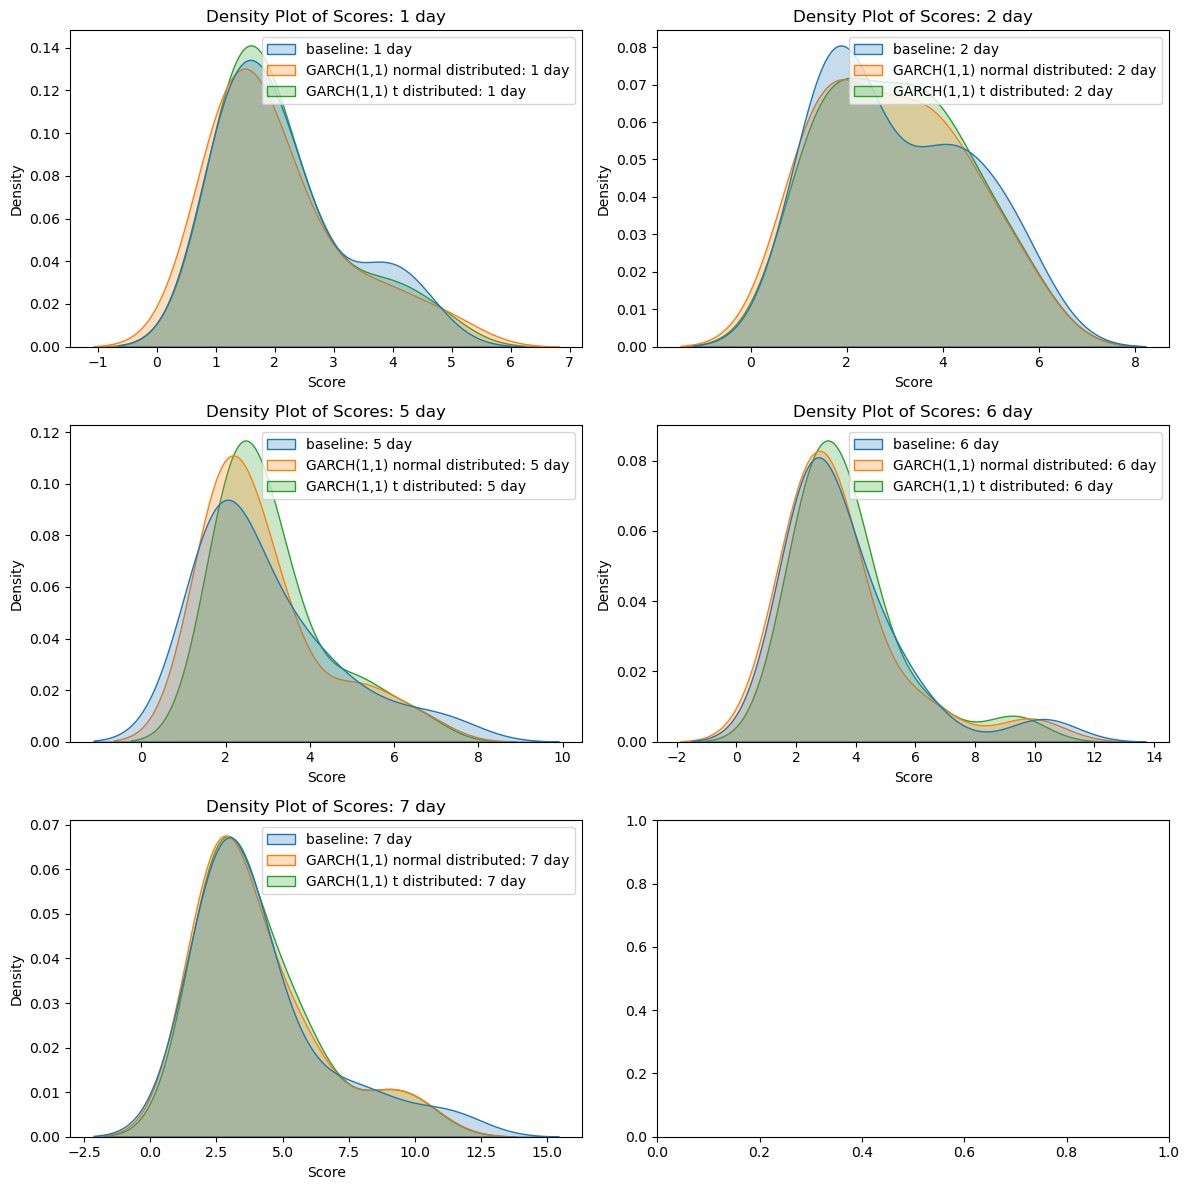

In [8]:
# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through each horizon
for i, h in enumerate(horizons):
    # Select columns related to the current horizon
    relevant_cols = [f'{m["name"]}: {h}' for m in models]

    # Filter the relevant data for the current horizon
    data_subset = score_df.loc[:, relevant_cols]

    # Create a KDE plot for the current horizon
    sns.kdeplot(data=data_subset, fill=True, ax=axes[i])

    # Set labels and title for each subplot
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Density Plot of Scores: {h}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

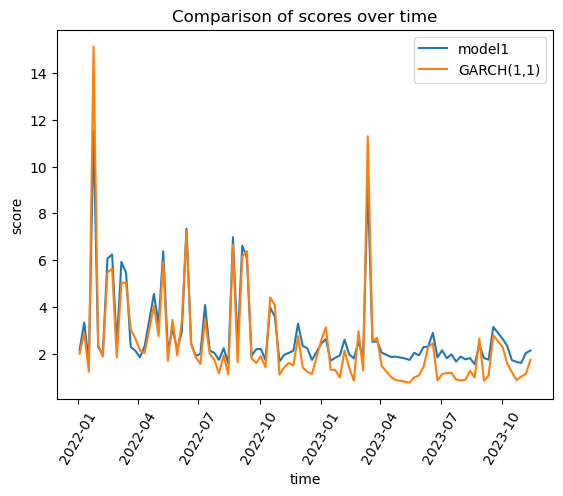

In [9]:
# Plot values from two columns over time
score_df_1d_no_na = score_df[score_df['model1: 5 day'].notna()]
score_df_garch_no_na = score_df[score_df['GARCH(1,1) model: 5 day'].notna()]

plt.plot(score_df_1d_no_na.index,
         score_df_1d_no_na['model1: 5 day'], label='model1')
plt.plot(score_df_garch_no_na.index, score_df_garch_no_na['GARCH(1,1) model: 5 day'], label='GARCH(1,1)')

# Adding labels and title
plt.xlabel('time')
plt.xticks(rotation=60)
plt.ylabel('score')
plt.title('Comparison of scores over time')

# Display legend
plt.legend()

# Show the plot
plt.show()

### Interpretation
GARCH(1,1) better than baseline (model1). 